(4157, 3) (1040, 3)
0.9971133028626413
0.864423076923077


---------- from now, outputs are for Cross validation -------------
fit_time :  [0.00666785 0.00655317 0.00686383 0.00714612 0.00658512]
score_time :  [0.00046611 0.00045013 0.00043702 0.00049615 0.00045276]
test_score :  [0.87019231 0.84615385 0.87680462 0.84889317 0.83541867]
final score of model :  0.8554925223957948
0.8554925223957948
scores :  {'fit_time': array([0.00786495, 0.00778508, 0.00978303, 0.00813484, 0.00789475,
       0.00759411, 0.00799894, 0.00797582, 0.00833988, 0.00884295]), 'score_time': array([0.00067997, 0.00079298, 0.00085497, 0.00060701, 0.00051212,
       0.00106287, 0.00059509, 0.00049996, 0.00075316, 0.00090718]), 'test_score': array([0.83461538, 0.88461538, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.86153846, 0.85549133, 0.85163776, 0.86705202]), 'train_score': array([0.99722044, 0.99679282, 0.99700663, 0.99700663, 0.99722044,
       0.99743425, 0.99743425, 0.9967935 , 0.9974348 , 0.99

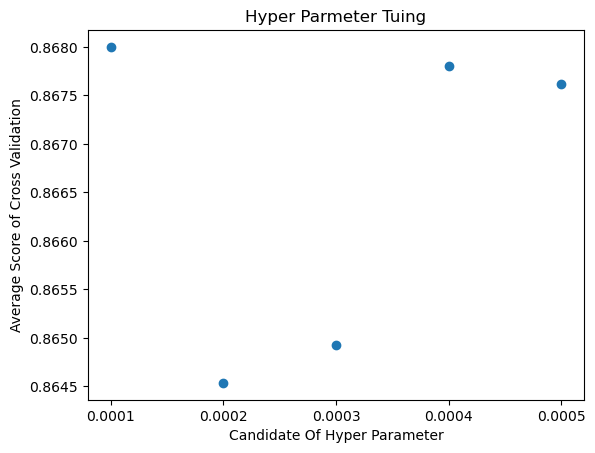

best value of hyper parameter among candidates :  {'min_impurity_decrease': 0.0001}
{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}
each test(cross-validation) score :  [0.85780355 0.85799604 0.85799604 ... 0.85818909 0.85838158 0.85838158]
number of scores :  2700
0.8683865773302731


---------- from now, outputs are for Random Search -------------
integer random number :  [2 7 5 3 7 2 9 3 3 2]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([103,  87, 104,  79,  92,  98, 104,  94, 125, 114]))
real random number :  [0.95643607 0.04956917 0.8557233  0.0403363  0.48638877 0.08594888
 0.19478552 0.32766706 0.63091597 0.79972794]
{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884
0.86


In [1]:
##Validation set

#Until now, we use test_set for evaluate model. 
#However, if you repeatedly use test_set and find the optimal model, there is a disadvantage that a model that fits test_set is created.
#So from now, we use validation set. We can separate train set fot make this like test_set.
#Example
    #Separate 20% from train_set for test_set and again 20% for validation set. 
    #Find optimal hyperparameter use train_set(60%), validation set(20%)
    #After find, give the final score as train_set + validation set(80%)  and test_set(20%)



import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()  #2-dimension array
target = wine['class'].to_numpy()                  #linear array.

from sklearn.model_selection import train_test_split
#separate test_data from whole (20% for test, 80% for train data)
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2
                                                                      , random_state = 42)

#separate validation_data from remain train_data (20% of train data(it is 16% of all data))
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2
                                                                , random_state = 42)

print(sub_input.shape, val_input.shape)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
#As we can see, It is overfitting to train_set. We have to change parameter for find better model.





print('\n\n---------- from now, outputs are for Cross validation -------------')
##Cross validation
#devide train set into k folds
#Each fold is used validation data in turn. Remain k-1 folds are used train_set.
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print('fit_time : ', scores['fit_time'])
print('score_time : ', scores['score_time'])
print('test_score : ', scores['test_score'])
#cross_validate() method return dictionary form(key-value form), this method default do 5-cross validation, we can change k value using cv parameter
    #fit_time : time taken to train model
    #score_time : time taken to scoring
    #test_score : validation_score for each fold  (scored by validation data)
    #train_score : train score for each fold      (scored by train data) (it is printed when return_train_score=True)
#Final score is average of test_score (It's name is test_score but don't forget, it is score of validation fold)
import numpy as np
print('final score of model : ', np.mean(scores['test_score']))

#this block is same with upper block --> 5-cross validation
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

#10-cross validation
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print('scores : ', scores)
print('train score : ', scores['train_score'])
print('test score : ', scores['test_score'])
print('final score of model : ', np.mean(scores['test_score']))





print('\n\n---------- from now, outputs are for Grid Search -------------')
##Grid search
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
print('params : ', params['min_impurity_decrease'])
#make dictionary. Key value is name of be serched parameter, value is range of parameter can get
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs=-1)
gs.fit(train_input, train_target)
#사이킷런의 그리드서치는 찾아낸 최적의 파라미터 조합으로 전체 훈련 세트에서 자동으로 다시 훈련을 진행한다. 그리고 그 모델을 best_estimator_에 저장한다.
#dt is best decision tree model that founded by GreedSearch
dt = gs.best_estimator_
print('score : ', dt.score(train_input, train_target))
#Best hyper parameters that grid search class found is contatined in best_params_
print('best parameters that GSmodel found : ', gs.best_params_)
#average score of cross_validation for each hyperparameter candidates is contained in 'mean_test_score' key value of gs.cv_results_ dictionary
print('average score for each hyperparameter candidate : ', gs.cv_results_['mean_test_score'])



######### Visualizing Result #########
import matplotlib.pyplot as plt
#x-label : value of dictionary 'min_impurity_decrease'
#y-label : value of cv_results_['mean_test_score']

plt.figure()
plt.title('Hyper Parmeter Tuing')
plt.xticks([0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006])
plt.xlabel('Candidate Of Hyper Parameter')
plt.ylabel('Average Score of Cross Validation')
plt.scatter(params['min_impurity_decrease'], gs.cv_results_['mean_test_score'])
plt.show()
#####################################



best_index = np.argmax(gs.cv_results_['mean_test_score'])
print('best value of hyper parameter among candidates : ', gs.cv_results_['params'][best_index])

#######
#use grid search on more complex parameters - find best combination of three hyperparameters
params = {
    'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
    'max_depth' : range(5, 20, 1),
    'min_samples_split' : range(2, 200, 10)
    }

gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)
print('each test(cross-validation) score : ', gs.cv_results_['mean_test_score'])
print('number of scores : ', len(gs.cv_results_['mean_test_score']))
print(np.max(gs.cv_results_['mean_test_score']))



print('\n\n---------- from now, outputs are for Random Search -------------')
##Random Search
from scipy.stats import uniform, randint
#uniform - 실수값  랜덤하게 뽑음
#randint - 정수값  랜덤하게 뽑음. --> C/C++의 rand()랑 동일하게 작동 하는듯?

rgen = randint(0,10)
print('integer random number : ', rgen.rvs(10))
#rvs : Random Variates Sampling

print(np.unique(rgen.rvs(1000), return_counts=True))

ugen = uniform(0,1)
print('real random number : ', ugen.rvs(10))


#randint(0,10) is object that genearate random integer number in a given range
#uniform(0,1) is object that generate random real number in a given range


#select kind of parameters that model will find
params = {
    'min_impurity_decrease' : uniform(0.0001, 0.001),
    'max_depth' : randint(20, 50),
    'min_samples_split' : randint(2, 25),
    'min_samples_leaf' : randint(1, 25),
    }

from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))
dt = gs.best_estimator_
print(dt.score(test_input, test_target))